We study the angular separation of the $H_0$ anisotropy of the same lightcone constrained by different relations or statistiscal methods. If different relations match closely, means we can safely combine the bootstrapping scanning results to make a joint constraint. If they don't, we might not be able to do so. And it means the $H_0$ variation arises more due to statistical noise rather than cosmic variance, where in the latter case the anisotropy should persist in all relations.

# Read and plot
We calculate the angular separation between two relations and make histogram of the angular separation. Considering also different relations. A total of 3 + 3 + 3 comparisons can be made. 

Different methods plus different relations feels like a niche case to do. The combined results makes more sense.

In [2]:
import pandas as pd
data0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_scatter.csv')
data0

,Unnamed: 0,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone,Significance,DeltaH0
0,0,LX-T,0.044489,0.029309,0.032752,-48.021817,38.028336,42.020201,-8.287346,29.513930,29.140801,86.123327,0,1.517910,8.897703
1,1,YSZ-T,0.022074,0.014781,0.019891,-119.937162,147.365447,61.635264,-35.817501,34.789693,42.111579,94.384478,0,1.493435,4.414759
2,2,LX-T,0.028688,0.019354,0.022638,-12.002991,97.655484,83.190884,42.861932,40.621710,31.590582,84.194876,1,1.482282,5.737694
3,3,YSZ-T,0.020565,0.014369,0.020016,-83.968204,81.233740,85.662503,-29.764978,39.517611,46.645611,100.796751,1,1.431246,4.112979
4,4,LX-T,0.021192,0.014550,0.022147,71.980186,98.737039,109.869115,33.498121,55.714631,38.514467,100.586012,2,1.456465,4.238369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,3449,YSZ-T,0.019327,0.013215,0.017632,-47.929301,92.299951,112.612525,-41.522852,33.612215,49.396216,88.373646,1725,1.462538,3.865425
3450,3450,LX-T,0.034821,0.021092,0.021755,-143.983871,110.033665,106.870531,58.231853,36.281340,21.953496,99.390808,1726,1.650886,6.964223
3451,3451,YSZ-T,0.016837,0.011791,0.017384,-119.927759,128.428714,89.106964,28.759483,58.795561,40.615018,91.730575,1726,1.427909,3.367318
3452,3452,LX-T,0.029272,0.020137,0.028460,-107.922366,128.812067,50.875875,23.197544,42.424733,38.152619,99.638867,1727,1.453593,5.854331


In [3]:
data1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_direct_compare_scatter.csv')
data1 = data1.replace('$L_\mathrm{{X}}-T$', 'LX-T')
data1 = data1.replace('$Y_\mathrm{{SZ}}-T$', 'YSZ-T')
data1 = data1.rename(columns={'Relations' : 'scaling_relation'}) # rename column name to join on
data1

,scaling_relation,Delta_H0,Significance,Glon,Glat,Lightcone
0,LX-T,0.073854,2.313296,-50.827893,13.043280,0
1,LX-T,0.042857,0.819068,-92.000000,28.000000,1
2,LX-T,0.069731,1.568688,123.220741,9.655936,2
3,LX-T,0.101255,2.136278,120.000000,-37.000000,3
4,LX-T,0.093342,2.057144,69.911098,-32.693093,4
...,...,...,...,...,...,...
1894,YSZ-T,0.085336,2.281843,142.807876,-28.879094,945
1895,YSZ-T,0.096950,2.553896,96.000000,34.000000,946
1896,YSZ-T,0.062395,1.514066,40.000000,26.000000,947
1897,YSZ-T,0.072673,1.661012,-76.000000,-44.000000,948


Merge on lightcone and scaling relations

In [4]:
# Merge on both lightcone and relations for comparison
data = pd.merge(data0, data1, on=['Lightcone', 'scaling_relation'], suffixes=('mc', 'm21'))
data

,Unnamed: 0,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone,Significancemc,DeltaH0,Delta_H0,Significancem21,Glon,Glat
0,0,LX-T,0.044489,0.029309,0.032752,-48.021817,38.028336,42.020201,-8.287346,29.513930,29.140801,86.123327,0,1.517910,8.897703,0.073854,2.313296,-50.827893,13.043280
1,1,YSZ-T,0.022074,0.014781,0.019891,-119.937162,147.365447,61.635264,-35.817501,34.789693,42.111579,94.384478,0,1.493435,4.414759,0.058826,1.343433,68.000000,-8.000000
2,2,LX-T,0.028688,0.019354,0.022638,-12.002991,97.655484,83.190884,42.861932,40.621710,31.590582,84.194876,1,1.482282,5.737694,0.042857,0.819068,-92.000000,28.000000
3,3,YSZ-T,0.020565,0.014369,0.020016,-83.968204,81.233740,85.662503,-29.764978,39.517611,46.645611,100.796751,1,1.431246,4.112979,0.110580,2.361757,108.000000,-8.000000
4,4,LX-T,0.021192,0.014550,0.022147,71.980186,98.737039,109.869115,33.498121,55.714631,38.514467,100.586012,2,1.456465,4.238369,0.069731,1.568688,123.220741,9.655936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1895,YSZ-T,0.015582,0.011006,0.017052,71.887314,100.797762,88.349716,-1.289409,54.747483,54.195424,91.930912,947,1.415746,3.116357,0.062395,1.514066,40.000000,26.000000
1895,1896,LX-T,0.043442,0.029374,0.037289,12.002281,68.354972,36.895818,8.205628,32.571752,33.075825,82.767124,948,1.478958,8.688452,0.095927,2.959509,-120.000000,-72.000000
1896,1897,YSZ-T,0.013015,0.009078,0.014914,143.967274,117.659847,114.527001,-6.187030,52.464355,60.129311,90.195213,948,1.433699,2.603045,0.072673,1.661012,-76.000000,-44.000000
1897,1898,LX-T,0.057267,0.028851,0.027726,-143.956303,60.901905,27.944992,-28.802280,27.982697,20.783315,0.000000,949,1.984905,11.453436,0.083108,2.503128,-159.438283,-31.727787


m21, LX-T, YSZ-T, Percentage of theta<60 is 0.34773445732349845
949
LX-T, YSZ-T, Percentage of theta<60 is 0.40252897787144365


/tmp/ipykernel_4040050/2111368623.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_match_lc = pd.merge(data[xmask], data[ymask], on='Lightcone', how='inner')


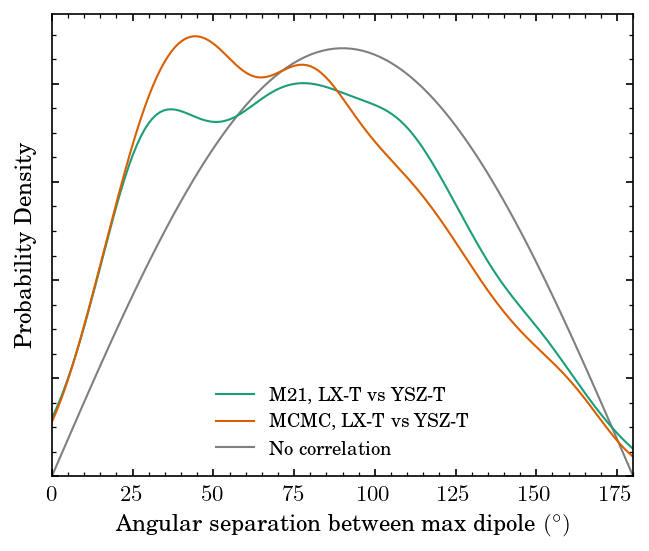

In [ ]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import clusterfit as cf

import itertools # for iteration all permutations

colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']  # https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=4
linestyles = ['solid','dashed']

plt.style.use('./nice.mplstyle')

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)

relation1 = 'LX-T'
relation2 = 'YSZ-T'


# The M21 method: match data
mask1 = data1['scaling_relation'] == relation1
mask2 = data1['scaling_relation'] == relation2
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

xlon = data_match_lc[f'Glon_x'].values
xlat = data_match_lc[f'Glat_x'].values

ylon = data_match_lc[f'Glon_y'].values
ylat = data_match_lc[f'Glat_y'].values

theta = cf.angular_separation(xlon, xlat, ylon, ylat)

print(f'm21, {relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')

# M21 method: plot
sns.kdeplot(theta, 
            linestyle=linestyles[0],
            color=colors[0],
            label=f'M21, {relation1} vs {relation2}'
            )


# The MCMC method: match data
xmask = data0['scaling_relation'] == relation1
ymask = data0['scaling_relation'] == relation2

data_match_lc = pd.merge(data[xmask], data[ymask], on='Lightcone', how='inner')

xlon = data_match_lc[f'vlon_x'].values
xlat = data_match_lc[f'vlat_x'].values
ylon = data_match_lc[f'vlon_y'].values
ylat = data_match_lc[f'vlat_y'].values

theta = cf.angular_separation(xlon, xlat, ylon, ylat)
print('Number of lightcones', len(theta))
print(f'{relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')

# MCMC method: plot
sns.kdeplot(theta, 
            linestyle=linestyles[0],
            color=colors[1],
            label=f'MCMC, {relation1} vs {relation2}'
            )

# # Compare the two methods: does for the same data the two methods agree?
# for relation, cl in zip((relation1, relation2), (colors[2], colors[3])):
#     mask = data['scaling_relation'] == relation

#     xlon = data[mask]['vlon'].values
#     xlat = data[mask]['vlat'].values

#     ylon = data[mask]['Glon'].values
#     ylat = data[mask]['Glat'].values

#     theta = cf.angular_separation(xlon, xlat, ylon, ylat)

#     # Plot
#     sns.kdeplot(theta, 
#                 linestyle=linestyles[1],
#                 color=cl,
#                 label=f'M21 vs MCMC, {relation}')


plt.xlim(0, 180)
plt.xlabel('Angular separation between max dipole $(^\circ)$')
plt.ylabel('Probability Density')
ax.set_yticklabels([])
#first_legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8)
# plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=8)

        
# -------------- Joop's comment, add a no correlation comparison ------------- #
theta = np.linspace(0, 180, 100)
p = lambda theta : 0.5 * np.sin(theta * np.pi/180) * np.pi/180
line, = plt.plot(theta, p(theta), color='black', linestyle='solid', alpha=0.5, zorder=0, label='No correlation')

# Add the second legend
#second_legend = plt.legend(handles=[line], loc='upper right', fontsize=10)

# Manually add the first legend back to the plot
#ax.add_artist(first_legend)
plt.legend(fontsize=9)
# plt.savefig('./to_paper/angular_separation_relations_scatter.png', dpi=200, bbox_inches='tight')
plt.show()